In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
!pip install xlrd

    100% |████████████████████████████████| 112kB 3.2MB/s ta 0:00:01


In [4]:
def FonctionImportDonnees(chemin):
    """
        importe les données du fichier excel, après expertise
    """
    donnees=pd.ExcelFile(chemin).parse(1) #Sélectionne la première feuille
    donnees=donnees.drop(index=[960,952]) #Supprime les lignes avec trop de NA
    donnees=donnees.drop('5°C T50 (h)',axis=1).drop('5°C T50 (j)',axis=1).drop('5°C TMG (h)',axis=1) #Supprime les colonnes avec information identique, ou avec trop de NA
    
    liste=[]
    col={}
    j=0
    
    for i in range(10,16): #Expertise: création des données de croissance
        a=donnees.columns[i]
        b=donnees.columns[i+1]
        liste.append(donnees[b]-donnees[a])
        c='v'+a+'-'+b
        col[j]=c.replace(' ','')
        j=j+1
    croissance=pd.DataFrame(liste).T
    croissance=croissance.rename(col, axis='columns')
    donnees=pd.concat([donnees,croissance],axis=1).dropna()
    donnees.set_index('rep')
    
    donnees=donnees[['Bancs', 'Pop', 'Echantillon', 'rep', 'N° rep', 'camera', 'semis','zone', '5°C TMG (j)', 'Aire sous la courbe', 'v15j-16j', 'v16j-17j', 'v17j-18j','v18j-19j', 'v19j-20j', 'v20j-21j']]
    
    quanti=['5°C TMG (j)', 'Aire sous la courbe', 'v15j-16j', 'v16j-17j', 'v17j-18j','v18j-19j', 'v19j-20j', 'v20j-21j']
    quali=['Bancs', 'Pop', 'N° rep', 'camera', 'semis','zone']
    
    return donnees,quanti,quali

#IMPORTATION DES DONNEES EXPERTISEES
donnees,quanti,quali = FonctionImportDonnees("https://raw.githubusercontent.com/etudiantdatascience/TER-reduction-dimension/master/Data/semis.xlsx")


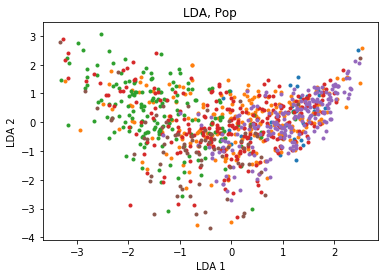

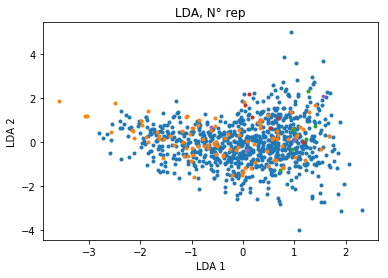

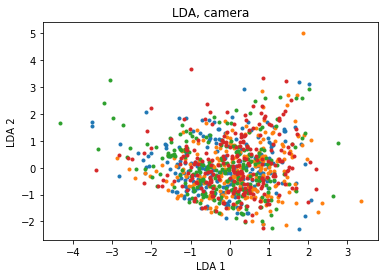

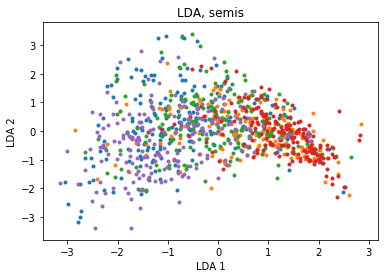

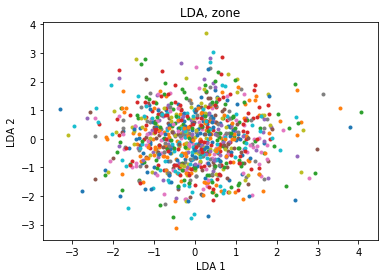

In [5]:
### LDA ###

"""
 On va ici utiliser la méthode LDA, en important les modules LinearDiscriminantAnalysis, train_test_split
 et StandardScaler de la bibliothèque sklearn.
 L'objectif est de trouver une combinaison linéaire des variables qui caractérisent ou séparent 2 ou plus
 classes d'individus.
"""

# Préparation des données

features = donnees.iloc[:, 8:16] # features = variables quantitatives
ListeQuali = ["1","4","5","6","7"]
num_quali = 1

for variableQuali in quali:
    valeur = donnees[variableQuali].drop_duplicates().values
    donnees[variableQuali] = donnees[variableQuali].replace(valeur,list(range(len(valeur))))

# Représentation graphique

for j in ListeQuali:
    k = int(j)
    labels = donnees.iloc[:, k].values  # labels = variables qualitatives
    lda = LDA(n_components = 2) # Utilisation de LDA pour réduire notre espace de variables à deux dimensions
    XterLDA = lda.fit(features,labels).transform(features)
    for groupe in range(int(min(labels)),int(max(labels)) + 1):
        x,y = [],[]
        for i in range(len(features)):
            if int(labels[i]) == groupe:
                x.append(XterLDA[i][0])
                y.append(XterLDA[i][1])
        plt.scatter(x,y,marker='.') 
    plt.title("LDA, " + str(quali[num_quali]))
    num_quali = num_quali + 1
    plt.xlabel('LDA 1')
    plt.ylabel('LDA 2')
    plt.show()
